In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os.path as op
import xrft
import gsw
from dask.diagnostics import ProgressBar
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/swot/SUM03/copernicus/dataset-duacs-rep-global-merged-allsat-phy-l4-v3/'
years = range(1994,2017)

In [3]:
ds = xr.open_mfdataset(op.join(ddir,str(years[-1]),'*.nc'))
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 366)
Coordinates:
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
Data variables:
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(366, 720, 2), chunksize=(1, 720, 2)>
    lon_bnds   (time, longitude, nv) float32 dask.array<shape=(366, 1440, 2), chunksize=(1, 1440, 2)>
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    sla        (time, latitude, longitude) float64 dask.array<shape=(366, 720, 1440), chunksize=(1, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(366, 720, 1440), chunksize=(1, 720, 1440)>
    ugosa      (time, latitude, longitude) float64 dask.array<shape=(366, 720, 1440), chunksize=(1, 720, 1440)>
    vgosa 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


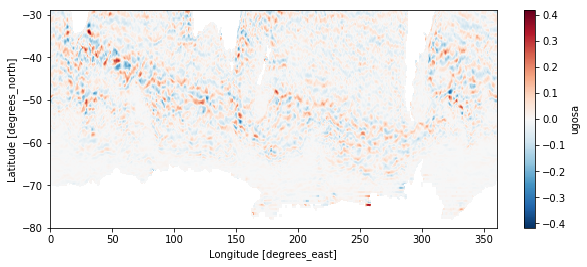

In [4]:
ug1 = ds.ugosa.sel(latitude=slice(-80,-29))
vg1 = ds.vgosa.sel(latitude=slice(-80,-29))
ug1.mean('time').plot(figsize=(10,4))

In [208]:
ug1.groupby('time.month')

In [4]:
for year in years:
    print(year)
    ds = xr.open_mfdataset(op.join(ddir,str(year),'*.nc')).sel(latitude=slice(-70,-29))
    if year == years[0]:
        ua = ds.ugosa
        ug = ds.ugos
#         fig, ax = plt.subplots(figsize=(10,4))
#         im = ax.pcolormesh(ds.longitude, ds.latitude, ug[0], cmap='RdBu_r', vmax=.5, vmin=-.5)
#         fig.colorbar(im, ax=ax)
#         plt.show()
    else:
        u1 = ds.ugosa
        u2 = ds.ugos
        ua = xr.concat([ua, u1], dim='time')
        ug = xr.concat([ug, u2], dim='time')
ug

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


<xarray.DataArray 'ugos' (time: 8401, latitude: 164, longitude: 1440)>
dask.array<shape=(8401, 164, 1440), dtype=float64, chunksize=(1, 164, 1440)>
Coordinates:
  * latitude   (latitude) float32 -69.875 -69.625 -69.375 ... -29.375 -29.125
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * time       (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2016-12-31
Attributes:
    grid_mapping:   crs
    long_name:      Absolute geostrophic velocity: zonal component
    standard_name:  surface_geostrophic_eastward_sea_water_velocity
    units:          m/s

In [6]:
with ProgressBar():
    ugclim = ug.mean('time').compute()

[########################################] | 100% Completed | 17min 12.8s


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


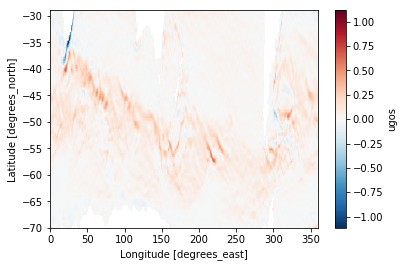

In [15]:
ugclim.plot()

No handles with labels found to put in legend.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


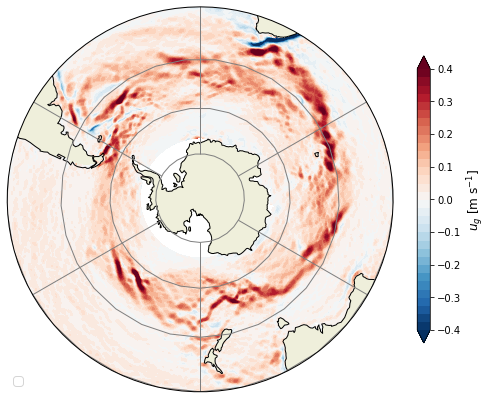

In [8]:
# topo = xr.open_dataset('/home/rdussin/etopo5.nc')
# lon = topo.topo_lon.data
# lon[lon<0] += 360
# topo = xr.DataArray(topo.topo.data, dims=['lat','lon'],
#                    coords={'lat':topo.topo_lat.data,'lon':lon})
# # topo.plot()
# topoSO = topo.isel(lat=slice(0,800))

copdir = '/swot/SUM03/copernicus_2017-2019/MADT_fronts/'
saf = pd.read_csv(op.join(copdir,'SAF.csv')).drop('Unnamed: 0',1)
pf = pd.read_csv(op.join(copdir,'PF.csv')).drop('Unnamed: 0',1)
saccf = pd.read_csv(op.join(copdir,'SACCF.csv')).drop("Unnamed: 0",1)
sbdy = pd.read_csv(op.join(copdir,'SBdy.csv')).drop("Unnamed: 0",1)

import matplotlib.ticker as mticker
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
# topoSO.where(topoSO<0.).plot.contourf(levels=np.linspace(-5e3,-100,20), cmap='YlGnBu_r', extend='both')

fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
# ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# i = 0
# for group in grouped:
# #     print(pd.DataFrame(group[1]).time.dt.month)
# #     if i == 0:
# #         print(pd.DataFrame(group[1]).time.dt.month)
# #     else:
# #         break
# #     i += 1
#     im = ax.scatter(pd.DataFrame(group[1]).lon.values, pd.DataFrame(group[1]).lat.values, 
#                   s=14., c=pd.DataFrame(group[1]).time.dt.month, cmap=ocean.cm.phase,
#                   vmin=1, vmax=12, rasterized=True,
#                   transform=ccrs.PlateCarree())
#     i += 1
# im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
#                   rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
#                   cmap='cividis', transform=ccrs.PlateCarree())
cs1 = ax.contourf(ug.longitude, ug.latitude, ugclim, 
                 levels=np.linspace(-.4,.4,33), extend='both', cmap='RdBu_r',
                 transform=ccrs.PlateCarree())
for c in cs1.collections:
    c.set_rasterized(True)
# cs2 = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO>0.), cmap='pink',
#                 levels=np.linspace(0,1000,20), extend='both',
#                 transform=ccrs.PlateCarree())
# for c in cs2.collections:
#     c.set_rasterized(True)

# ax.plot(pf.lon.data, (pf.lat).data, 'k', lw=2, transform=ccrs.PlateCarree())
# ax.plot(saf.lon.data, (saf.lat).data, 'k--', lw=2, transform=ccrs.PlateCarree())
# ax.plot(saccf.lon.data, (saccf.lat).data, 'k:', lw=3, transform=ccrs.PlateCarree())
# ax.plot(sbdy.lon.data, (sbdy.lat).data, 'k:', lw=3, transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=1, color='gray', linestyle='-')
ax.set_extent([-180, 180, -90, -30],crs=ccrs.PlateCarree(),)
gl.xlabels_top = False
gl.ylabels_left = False
# gl2.xlines = False
gl.xlocator = mticker.FixedLocator([-180,-120,-60,0,60,120,180])
gl.ylocator = mticker.FixedLocator([-75, -60,-45,-30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.legend(loc='lower left', fontsize=12)
# ax.legend(loc='lower right', fontsize=11)
# ax.set_rasterization_zorder(-10)
cbar = fig.colorbar(cs1, ax=ax, shrink=.7)
# cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
#                                         'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"$u_g$ [m s$^{-1}$]", fontsize=12)
plt.savefig('/swot/SUM03/copernicus_2017-2019/Ugclim_AVISO.pdf')

In [10]:
N = ug.shape
days = N[0]
print(len(range(0,days-366,14)), len(years))
print(len(range(0,days-366,14))/(len(years)-1))
days-366

574 23
26.09090909090909


8035

In [11]:
ug = xr.DataArray(ug, dims=['days','latitude','longitude'],
                 coords={'days':range(days),'latitude':ds.latitude.data,'longitude':ds.longitude.data}
                 )
vg = xr.DataArray(vg, dims=['days','latitude','longitude'],
                 coords={'days':range(days),'latitude':ds.latitude.data,'longitude':ds.longitude.data}
                 )

In [12]:
KE = .5*(ug**2 + vg**2)
KE

<xarray.DataArray (days: 8401, latitude: 160, longitude: 1440)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.052957, 0.051899, ..., 0.02606 , 0.037977],
        [0.06525 , 0.052343, ..., 0.033945, 0.054248]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.053201, 0.052802, ..., 0.026166, 0.038187],
        [0.064951, 0.049777, ..., 0.036757, 0.055956]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan, 0.000111, ...,      nan,      nan],
        ...,
        [0.040057, 0.038694, ..., 0.059225, 0.060535],
        [0.058056, 0.044509, ..., 0.08049 , 0.080811]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan, 0.000102, ...,      nan,      nan],
        ...,
        [0.0375  , 0.03946 , ..., 0.061746, 0.055977],
        [0.055115, 0.044106, ..., 0.0825

In [14]:
KE.to_dataset(name='KE').to_netcdf('/swot/SUM05/takaya/AVISO/AVISO-KE_30-70S.nc')

In [8]:
with ProgressBar():
    ugk2 = xrft.power_spectrum(ug.chunk(chunks={'days':1}),
                              dim=['longitude'], detrend='constant').compute()
    vgk2 = xrft.power_spectrum(vg.chunk(chunks={'days':1}),
                              dim=['longitude'], detrend='constant').compute()
ugk2

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 43.6s


/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 42.7s


<xarray.DataArray 'rechunk-merge-8714c86e9114d9fbd5688b6df1783e96' (days: 8401, latitude: 20, freq_longitude: 1440)>
array([[[2.934028e-10, 7.057699e-10, ..., 6.174936e-10, 7.057699e-10],
        [1.736111e-12, 3.351081e-10, ..., 4.281076e-11, 3.351081e-10],
        ...,
        [4.340278e-11, 4.041702e-11, ..., 1.117525e-10, 4.041702e-11],
        [1.736111e-12, 4.033151e-10, ..., 1.428584e-10, 4.033151e-10]],

       [[2.934028e-10, 1.019496e-11, ..., 2.534814e-10, 1.019496e-11],
        [4.340278e-11, 8.678506e-11, ..., 1.756249e-10, 8.678506e-11],
        ...,
        [3.402778e-10, 3.142721e-10, ..., 4.114806e-10, 3.142721e-10],
        [1.668403e-09, 2.910559e-10, ..., 1.179168e-10, 2.910559e-10]],

       ...,

       [[8.506944e-11, 5.550420e-11, ..., 1.811600e-10, 5.550420e-11],
        [1.820815e-35, 8.497394e-10, ..., 3.091882e-11, 8.497394e-10],
        ...,
        [1.406250e-10, 7.102320e-11, ..., 4.301990e-10, 7.102320e-11],
        [6.944444e-12, 4.890723e-11, ..., 3.27

In [9]:
ekek = (ugk2 + vgk2).real[::14]
ekek

<xarray.DataArray (days: 601, latitude: 20, freq_longitude: 1440)>
array([[[4.670139e-10, 8.824692e-10, ..., 9.735610e-10, 8.824692e-10],
        [2.951389e-11, 4.614965e-10, ..., 8.035968e-11, 4.614965e-10],
        ...,
        [5.902778e-11, 2.575091e-10, ..., 4.638778e-10, 2.575091e-10],
        [4.513889e-11, 4.496661e-10, ..., 7.428854e-10, 4.496661e-10]],

       [[2.517361e-10, 2.179497e-10, ..., 2.454962e-10, 2.179497e-10],
        [1.684028e-10, 9.316059e-11, ..., 4.163712e-10, 9.316059e-11],
        ...,
        [4.756944e-10, 4.124045e-10, ..., 2.994261e-10, 4.124045e-10],
        [6.423611e-11, 4.087772e-10, ..., 9.186295e-11, 4.087772e-10]],

       ...,

       [[1.670139e-09, 1.605293e-10, ..., 3.795160e-10, 1.605293e-10],
        [1.475694e-10, 2.668815e-10, ..., 2.706786e-10, 2.668815e-10],
        ...,
        [2.031250e-10, 5.477342e-10, ..., 5.436918e-10, 5.477342e-10],
        [5.902778e-10, 2.406798e-10, ..., 4.403320e-10, 2.406798e-10]],

       [[4.045139e-10, 

In [10]:
llon, llat = np.meshgrid(ds.longitude.values[:2], ds.latitude.values)
# x = gsw.distance(ds.longitude, np.ones_like(ds.longitude)*ds.latitude.data[int(.5*N[1])])
dx = gsw.distance(llon, llat, axis=1)
print(llon,llat,dx)
# dx = np.diff(x[int(.5*N[1])])
# dx

[[0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]
 [0.125 0.375]] [[-60.875 -60.875]
 [-60.625 -60.625]
 [-60.375 -60.375]
 [-60.125 -60.125]
 [-59.875 -59.875]
 [-59.625 -59.625]
 [-59.375 -59.375]
 [-59.125 -59.125]
 [-58.875 -58.875]
 [-58.625 -58.625]
 [-58.375 -58.375]
 [-58.125 -58.125]
 [-57.875 -57.875]
 [-57.625 -57.625]
 [-57.375 -57.375]
 [-57.125 -57.125]
 [-56.875 -56.875]
 [-56.625 -56.625]
 [-56.375 -56.375]
 [-56.125 -56.125]] [[13530.09566689]
 [13635.92483041]
 [13741.49438641]
 [13846.80232502]
 [13951.8466413 ]
 [14056.62533537]
 [14161.1364124 ]
 [14265.37788265]
 [14369.3477615 ]
 [14473.04406952]
 [14576.46483248]
 [14679.6080814 ]
 [14782.47185258]
 [14885.05418763]
 [14987.35313355]
 [15089.36674269]
 [15191.09307288]
 [15292.5301

In [11]:
kx = np.zeros((len(ds.latitude),int(.5*len(ds.longitude))))

for i in range(len(ds.latitude)):
    kx[i] = np.fft.fftshift(np.fft.fftfreq(len(ds.longitude), np.abs(dx[i])))[int(.5*len(ds.longitude)):]
kx[0]

array([0.00000000e+00, 5.13259079e-08, 1.02651816e-07, 1.53977724e-07,
       2.05303632e-07, 2.56629540e-07, 3.07955448e-07, 3.59281355e-07,
       4.10607263e-07, 4.61933171e-07, 5.13259079e-07, 5.64584987e-07,
       6.15910895e-07, 6.67236803e-07, 7.18562711e-07, 7.69888619e-07,
       8.21214527e-07, 8.72540435e-07, 9.23866343e-07, 9.75192251e-07,
       1.02651816e-06, 1.07784407e-06, 1.12916997e-06, 1.18049588e-06,
       1.23182179e-06, 1.28314770e-06, 1.33447361e-06, 1.38579951e-06,
       1.43712542e-06, 1.48845133e-06, 1.53977724e-06, 1.59110315e-06,
       1.64242905e-06, 1.69375496e-06, 1.74508087e-06, 1.79640678e-06,
       1.84773269e-06, 1.89905859e-06, 1.95038450e-06, 2.00171041e-06,
       2.05303632e-06, 2.10436223e-06, 2.15568813e-06, 2.20701404e-06,
       2.25833995e-06, 2.30966586e-06, 2.36099176e-06, 2.41231767e-06,
       2.46364358e-06, 2.51496949e-06, 2.56629540e-06, 2.61762130e-06,
       2.66894721e-06, 2.72027312e-06, 2.77159903e-06, 2.82292494e-06,
      

In [13]:
dsave = ekek.to_dataset(name='eke')
dsave['kx'] = xr.DataArray(kx, dims=['lat','iK'],
                          coords={'lat':ds.latitude.data,'iK':range(int(.5*len(ds.longitude)))})
dsave.to_netcdf('AVISO_EKEk_56-61S.nc')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


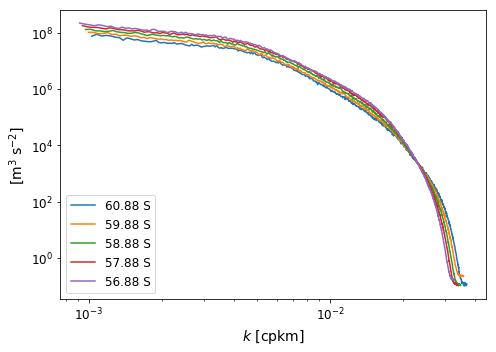

In [247]:
fig, ax = plt.subplots(figsize=(7,5))
fig.set_tight_layout(True)
for i in range(0,20,4):
    im = ax.plot(kx[i,20:]*1e3, ekek[:,i,int(.5*len(ds.longitude))+20:].mean('days').data*kx[i,20:]**-1,
                label=r'%.2f S' % round(np.abs(ekek.latitude.data[i]),2)
                )
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$ [cpkm]', fontsize=14)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]', fontsize=14)
ax.legend(loc='lower left', fontsize=12)
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label(r"[m$^3$ s$^{-2}$]", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('EKEclim_AVISO.pdf')

In [199]:
seasons = np.tile(np.repeat(range(4),6),len(years)+2)
len(seasons)

600

In [223]:
15*86400

1296000